In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [58]:
headers = ["App", "Category", "Rating", "Reviews", "Size", "Installs", "Type", "Price", "Content Rating", "Genres", "Last Updated", "Current Ver", "Android Ver"]
data = pd.read_csv('/googleplaystore.csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [59]:
#размер датасета
data.shape

(10841, 13)

In [60]:
#список колонок с типами данных
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [61]:
#проверка на пропуски в датасете
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [62]:
#удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((10841, 13), (10841, 8))

In [63]:
#удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((10841, 13), (9360, 13))

In [64]:
#заполнение всех пропущенных значений нулями
#некорректно, т.к. нулями заполняются числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [65]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 10841


In [66]:
#выберем числовые колонки с пропущенными значениями
#цикл по колонкам датасета
num_cols = []
for col in data.columns:
    temp_null_count = data [data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count > 0 and (dt == 'float64' or dt == 'int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%'.format(col, dt, temp_null_count, temp_perc))

Колонка Rating. Тип данных float64. Количество пустых значений 1474, 13.6%


In [67]:
#фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10836,4.5
10837,5.0
10838,NaN
10839,4.5


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


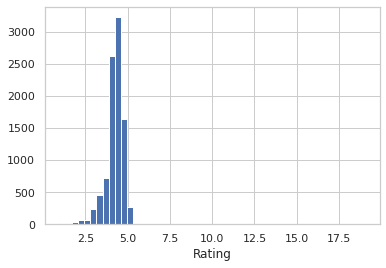

In [68]:
#гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [69]:
#фильтр по пустым значениям поля Rating
data[data['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [70]:
#запоминаем индексы строк с пустыми значениями
flt_index = data[data['Rating'].isnull()].index
flt_index

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1474)

In [71]:
#проверим, что выводятся нужные строки
data[data.index.isin(flt_index)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [72]:
#фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Rating']

23      NaN
113     NaN
123     NaN
126     NaN
129     NaN
         ..
10824   NaN
10825   NaN
10831   NaN
10835   NaN
10838   NaN
Name: Rating, Length: 1474, dtype: float64

In [73]:
data_num_Rating = data_num[['Rating']]
data_num_Rating.head()

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [75]:
#фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Rating)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [0]:
strategies=['mean', 'median', 'most_frequent']
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy = strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Rating)
    return data_num_imp[mask_missing_values_only]

In [77]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([4.19333832, 4.19333832, 4.19333832, ..., 4.19333832, 4.19333832,
        4.19333832]))

In [78]:
strategies[1], test_num_impute(strategies[1])

('median', array([4.3, 4.3, 4.3, ..., 4.3, 4.3, 4.3]))

In [79]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([4.4, 4.4, 4.4, ..., 4.4, 4.4, 4.4]))

In [0]:
#Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy = strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [82]:
data[['Rating']].describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [81]:
test_num_impute_col(data, 'Rating', strategies[0])

('Rating', 'mean', 1474, 4.193338315362443, 4.193338315362443)

In [83]:
test_num_impute_col(data, 'Rating', strategies[1])

('Rating', 'median', 1474, 4.3, 4.3)

In [84]:
test_num_impute_col(data, 'Rating', strategies[2])

('Rating', 'most_frequent', 1474, 4.4, 4.4)

In [85]:
#Выберем категориальные колонки с пропущенными значениями
#Цикл по колонкам датасета
categ_cols = []
for col in data.columns:
    temp_null_count = data [data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count > 0 and (dt == 'object'):
        categ_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%'.format(col, dt, temp_null_count, temp_perc))

Колонка Type. Тип данных object. Количество пустых значений 1, 0.01%
Колонка Content Rating. Тип данных object. Количество пустых значений 1, 0.01%
Колонка Current Ver. Тип данных object. Количество пустых значений 8, 0.07%
Колонка Android Ver. Тип данных object. Количество пустых значений 3, 0.03%


In [86]:
categ_temp_data = data[['Content Rating']]
categ_temp_data.head()

,Content Rating
0,Everyone
1,Everyone
2,Everyone
3,Teen
4,Everyone


In [87]:
categ_temp_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [88]:
categ_temp_data[categ_temp_data['Content Rating'].isnull()].shape

(1, 1)

In [89]:
#импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(categ_temp_data)
data_imp2

array([['Everyone'],
       ['Everyone'],
       ['Everyone'],
       ...,
       ['Everyone'],
       ['Mature 17+'],
       ['Everyone']], dtype=object)

In [90]:
np.unique(data_imp2)

array(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Teen', 'Unrated'], dtype=object)

In [91]:
#импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='EA')
data_imp3 = imp3.fit_transform(categ_temp_data)
data_imp3

array([['Everyone'],
       ['Everyone'],
       ['Everyone'],
       ...,
       ['Everyone'],
       ['Mature 17+'],
       ['Everyone']], dtype=object)

In [92]:
np.unique(data_imp3)

array(['Adults only 18+', 'EA', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Teen', 'Unrated'], dtype=object)

In [93]:
data_imp3[data_imp3 == 'EA'].size

1

In [94]:
categ_enc = pd.DataFrame({'c1':data_imp2.T[0]})
categ_enc

,c1
0,Everyone
1,Everyone
2,Everyone
3,Teen
4,Everyone
...,...
10836,Everyone
10837,Everyone
10838,Everyone
10839,Mature 17+


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
categ_enc_le = le.fit_transform(categ_enc['c1'])

In [96]:
categ_enc['c1'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [97]:
np.unique(categ_enc_le)

array([0, 1, 2, 3, 4, 5])

In [98]:
le.inverse_transform([0, 1, 2, 3, 4, 5])

array(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Teen', 'Unrated'], dtype=object)

In [0]:
ohe = OneHotEncoder()
categ_enc_ohe = ohe.fit_transform(categ_enc[['c1']])

In [100]:
categ_enc.shape

(10841, 1)

In [101]:
categ_enc_ohe.shape

(10841, 6)

In [102]:
categ_enc_ohe

<10841x6 sparse matrix of type '<class 'numpy.float64'>'
	with 10841 stored elements in Compressed Sparse Row format>

In [103]:
categ_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.]])

In [104]:
categ_enc.head(10)

,c1
0,Everyone
1,Everyone
2,Everyone
3,Teen
4,Everyone
5,Everyone
6,Everyone
7,Everyone
8,Everyone
9,Everyone


In [105]:
pd.get_dummies(categ_enc).head()

,c1_Adults only 18+,c1_Everyone,c1_Everyone 10+,c1_Mature 17+,c1_Teen,c1_Unrated
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [106]:
pd.get_dummies(categ_temp_data, dummy_na=True).head()

,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Content Rating_nan
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0


In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [0]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Rating']])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


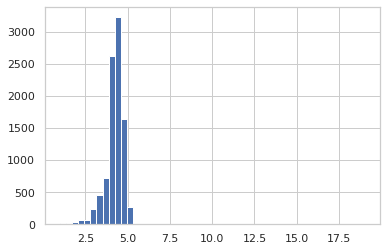

In [109]:
plt.hist(data['Rating'], 50)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


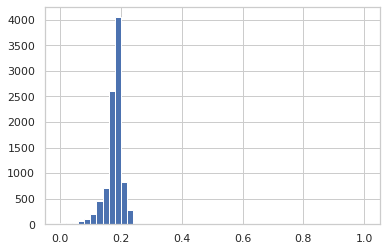

In [110]:
plt.hist(sc1_data, 50)
plt.show()

In [0]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Rating']])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


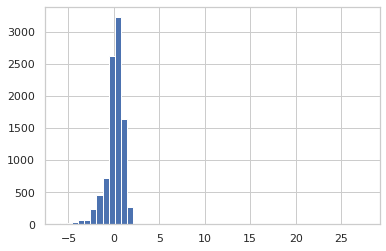

In [111]:
plt.hist(sc2_data, 50)
plt.show()